## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [1]:
! git clone https://www.github.com/DS3001/kmc

Cloning into 'kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 25 (delta 4), reused 3 (delta 3), pack-reused 18
Receiving objects: 100% (25/25), 5.04 MiB | 22.85 MiB/s, done.
Resolving deltas: 100% (4/4), done.


**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

# Q1 #1

In [2]:
import pandas as pd
# airbnb_hw.csv
airbnb = pd.read_csv('/content/kmc/data/airbnb_hw.csv')
df = airbnb.loc[:,['Price','Beds','Number Of Reviews','Review Scores Rating']]
df.shape

(30478, 4)

In [3]:
df.columns

Index(['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating'], dtype='object')

In [5]:
df.head()

,Price,Beds,Number Of Reviews,Review Scores Rating
0,145.0,1.0,0,NaN
1,37.0,1.0,1,NaN
2,28.0,1.0,1,NaN
3,199.0,3.0,0,NaN
4,549.0,3.0,39,96.0


In [4]:
# clean: Price, Beds, Number of Reviews, and Review Scores Rating
# airbnb['Price'].head(20)

df['Price'].dtype # object dtype, need to change to numeric
df['Price'].unique() ## need to remove commas
df['Price'] = df['Price'].str.replace(',', ' ')
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')

In [6]:
# check that '.' is gone
df['Price'].unique()

array([145.,  37.,  28., 199., 549., 149., 250.,  90., 270., 290., 170.,
        59.,  49.,  68., 285.,  75., 100., 150., 700., 125., 175.,  40.,
        89.,  95.,  99., 499., 120.,  79., 110., 180., 143., 230., 350.,
       135.,  85.,  60.,  70.,  55.,  44., 200., 165., 115.,  74.,  84.,
       129.,  50., 185.,  80., 190., 140.,  45.,  65., 225., 600., 109.,
        nan,  73., 240.,  72., 105., 155., 160.,  42., 132., 117., 295.,
       280., 159., 107.,  69., 239., 220., 399., 130., 375., 585., 275.,
       139., 260.,  35., 133., 300., 289., 179.,  98., 195.,  29.,  27.,
        39., 249., 192., 142., 169., 131., 138., 113., 122., 329., 101.,
       475., 238., 272., 308., 126., 235., 315., 248., 128.,  56., 207.,
       450., 215., 210., 385., 445., 136., 247., 118.,  77.,  76.,  92.,
       198., 205., 299., 222., 245., 104., 153., 349., 114., 320., 292.,
       226., 420., 500., 325., 307.,  78., 265., 108., 123., 189.,  32.,
        58.,  86., 219., 800., 335.,  63., 229., 42

In [7]:
df.describe()

,Price,Beds,Number Of Reviews,Review Scores Rating
count,30297.000000,30393.000000,30478.000000,22155.000000
mean,153.357032,1.530089,12.018735,91.993230
std,108.895698,1.015359,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,192.000000,2.000000,13.000000,100.000000
max,999.000000,16.000000,257.000000,100.000000


In [8]:
# clean: Price, Beds, Number of Reviews, and Review Scores Rating

# beds
df['Beds'].unique()

# take out period, check dtype, fill nan
df['Beds'].dtype # good dtype
df['Beds'] = airbnb['Beds'].fillna(1)

In [9]:
# clean: Price, Beds, Number of Reviews, and Review Scores Rating

# num of reviews
df['Number Of Reviews'].unique()
df['Number Of Reviews'].dtype

# looks good

dtype('int64')

In [10]:
# clean: Price, Beds, Number of Reviews, and Review Scores Rating

# Review Scores Rating
df['Review Scores Rating'].unique()
df['Review Scores Rating'].dtype

# dtype is good, need to drop nan values
# df['Review Scores Rating'] = df['Review Scores Rating'].dropna()

dtype('float64')

In [11]:
# df = airbnb.loc[:,['Price','Beds','Number Of Reviews','Review Scores Rating']]
df = df.dropna()

In [11]:
df.columns

Index(['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating'], dtype='object')

In [12]:
df.describe()

,Price,Beds,Number Of Reviews,Review Scores Rating
count,22104.000000,22104.000000,22104.000000,22104.000000
mean,150.827814,1.548860,16.521127,91.986699
std,100.263647,1.012773,24.327880,8.847351
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,3.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,999.000000,16.000000,257.000000,100.000000


# Q1 #2

In [13]:
# Maxmin normalize the data and remove any nan's (KMeans from sklearn doesn't accept nan input).

def maxmin(x):
  x = (x-min(x))/(max(x)-min(x))
  return x

In [14]:
X = df.drop('Price', axis=1)
X = X.apply(maxmin)

# Q1 #3

In [15]:
# Use sklearn's KMeans module to cluster the data by Beds, Number of Reviews, and Review Scores Rating for k=6.

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

model = KMeans(n_clusters=6, max_iter=200, n_init = 10,  random_state=0) # Pass centroids and options into the model
model = model.fit(X) # Initialize a kmc model

In [16]:
X['cluster'] = model.labels_
X.describe()

,Beds,Number Of Reviews,Review Scores Rating,cluster
count,22104.000000,22104.000000,22104.000000,22104.000000
mean,0.096804,0.060629,0.899834,1.578764
std,0.063298,0.095031,0.110592,1.553796
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.007812,0.862500,0.000000
50%,0.062500,0.023438,0.925000,2.000000
75%,0.125000,0.074219,1.000000,2.000000
max,1.000000,1.000000,1.000000,5.000000


# Q1 #4

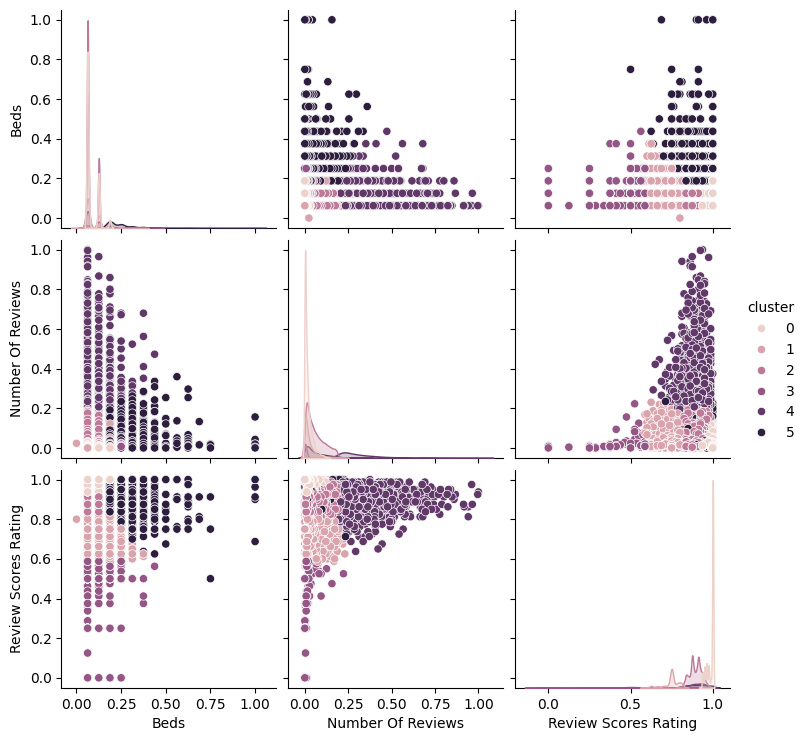

In [17]:
# Use seaborn's .pairplot() to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

import seaborn as sns
sns.pairplot(data=X, hue='cluster')

# Q1 #5

In [18]:
df.columns

Index(['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating'], dtype='object')

In [19]:
# Use .groupby and .describe to compute the average price for each cluster. Which clusters have the highest rental prices?
df['cluster'] = model.labels_
df.loc[:,['Price','cluster']].groupby('cluster').describe()

Price                                                          
          count        mean         std   min    25%    50%    75%    max
cluster                                                                  
0        7825.0  151.682428   94.079702  10.0   85.0  130.0  195.0  985.0
1        2849.0  130.183573   83.291814  20.0   70.0  109.0  165.0  899.0
2        7480.0  135.949733   75.865513  22.0   82.0  120.0  175.0  999.0
3         448.0  119.879464   85.368624  25.0   60.0   90.0  150.0  499.0
4        1766.0  135.049830   78.224213  27.0   85.0  119.5  170.0  875.0
5        1736.0  268.998848  166.500720  27.0  150.0  225.0  350.0  997.0

Cluster 5 has the highest rental price by far at about 269 dollars a night. This is more than any of the other clusters by far as cluster 3 had a mean of 120 dollars and cluster one was second least at 130 dollars per night.

# Q1 #6

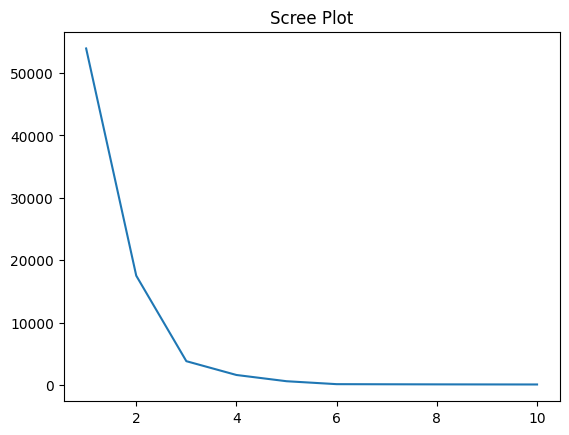

In [20]:
# Use a scree plot to pick the number of clusters and repeat steps 4 and 5.
import numpy as np

k_bar = 10
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

Price                                                         
           count        mean         std   min   25%    50%    75%    max
cluster                                                                  
0        10674.0  145.944163   91.815120  10.0  80.0  125.0  185.0  985.0
1         7928.0  135.041625   76.518116  22.0  80.0  120.0  175.0  999.0
2         3502.0  201.450600  145.979117  27.0  99.0  160.0  250.0  997.0

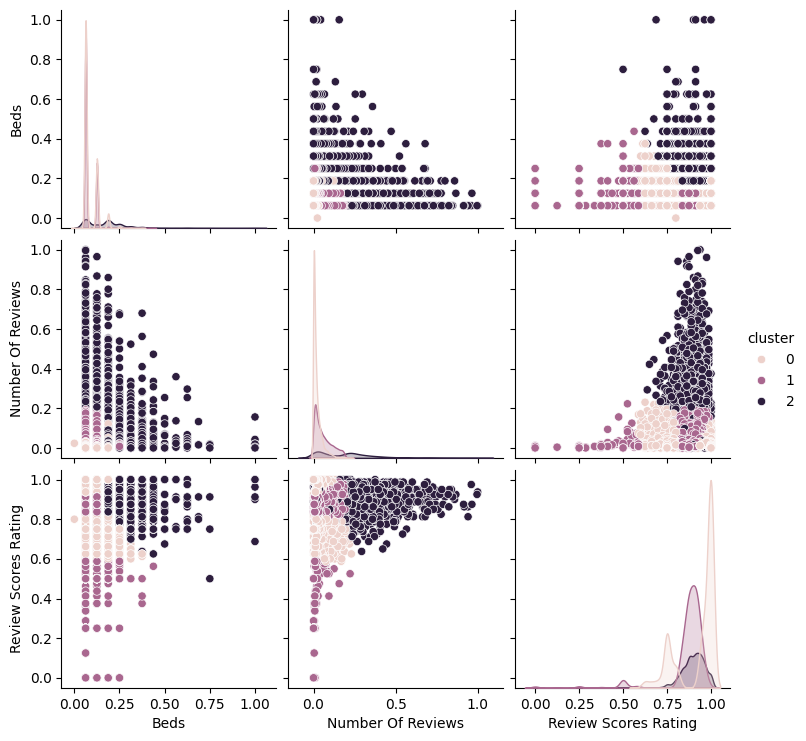

In [22]:
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0) # Create a model for k
model = model.fit(X) # Fit the emodel
X['cluster'] = model.labels_

# part 4 repeated
sns.pairplot(data=X, hue='cluster')

# part 5 repeated
df['cluster'] = model.labels_
df.loc[:,['Price','cluster']].groupby('cluster').describe()

Cluster 2 has the most number of reviews as well as the highest scores, compared to cluster 0 and 1. Cluster 0 had the second most number of reviews and cluster 1 had the least number of reviews. It seems like cluster 1 has the most variance when it comes to scores of the reviews while cluster 2 had the least variance. Looking at price, cluster 2 had the highest mean, cluster 0 had the second highest, and cluster 1 had the lowest mean. This data makes sense as cluster 2 had the most reviews and highest ratings, so it should have the highest average price while cluster 1 was less reliable with the most variance in ratings so it should have the least average price.

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

# Q2: #1

In [40]:
# Run the code below, which creates four datasets: df0_125, df0_25, df0_5, df1_0, and df2_0.
# Each data set is created by increasing the amount of noise (standard deviation) around the cluster centers,
# from 0.125 to 0.25 to 0.5 to 1.0 to 2.0.

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def createData(noise,N=50):
    np.random.seed(100)
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

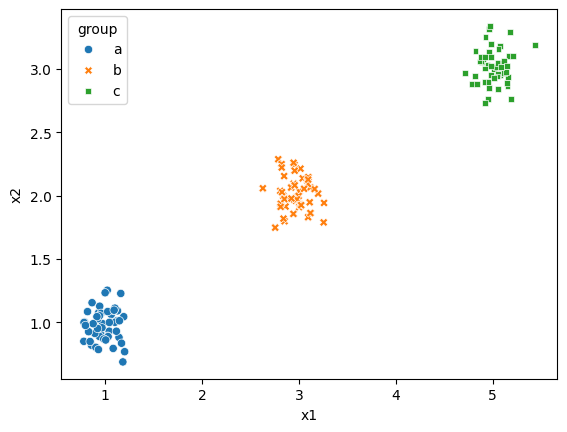

In [41]:
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

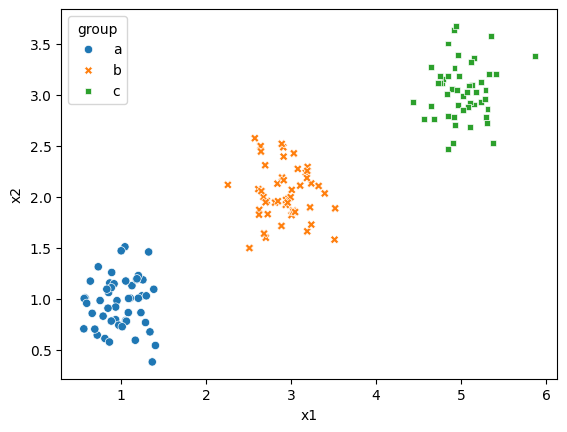

In [42]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

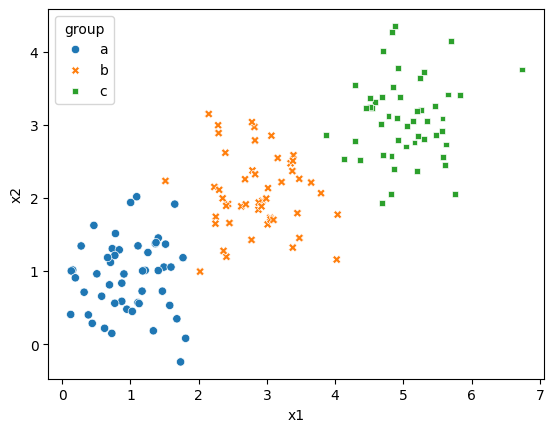

In [43]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

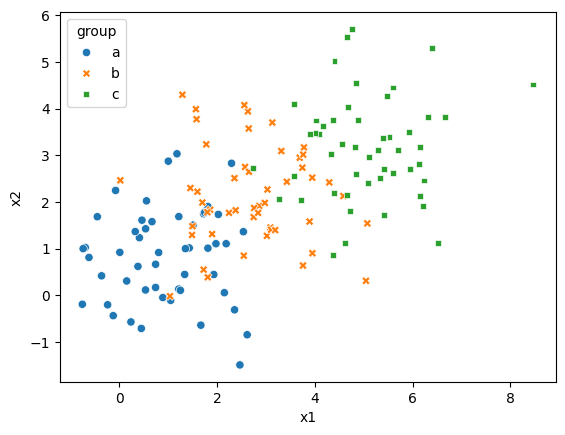

In [44]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

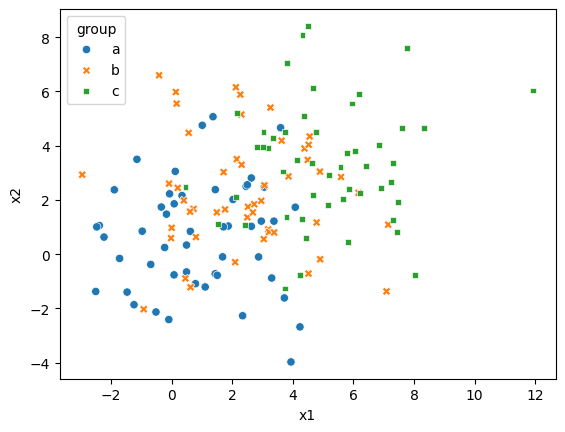

In [45]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

As noice increases from0.125 to 2,0, dispersion of datapoints increases and visual distinctness decreases of the clusters. The clusters start to become less distinct.

# Q2: #2

In [ ]:
# Make scatterplots of the  (X1,X2)  points by group for each of the datasets.
# As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

# Q2: #3

In [ ]:
# Create a scree plot for each of the datasets.
# Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow")
# and your ability to definitively select a  k

# Q2: #4

In [ ]:
# Explain the intuition of the elbow, using this numerical simulation as an example.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?